In [1]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the preprocessed data
with open("../dataset/secom_data_smoted.pkl", "rb") as file:
    secom_data = pickle.load(file)

secom_data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3031.790000,2479.690000,2186.988900,949.220100,1.298100,100.0,103.332200,0.121900,1.463600,0.000900,...,0.010500,70.061800,0.503500,0.008500,0.002400,1.681800,0.048400,0.033900,0.010500,70.061800
1,3049.970000,2441.120000,2263.322200,1383.833400,2.398600,100.0,85.177800,0.119600,1.379200,0.005400,...,0.003300,39.552800,0.505300,0.015900,0.003800,3.145600,0.026200,0.010400,0.003300,39.552800
2,2870.760000,2583.560000,2192.188900,1435.961100,2.387000,100.0,107.398900,0.122900,1.471900,-0.000300,...,0.006300,193.828600,0.501000,0.012700,0.003700,2.534400,0.011100,0.021500,0.006300,193.828600
3,2996.900000,2448.070000,2162.755600,1041.155700,0.847900,100.0,107.262200,0.122100,1.444600,-0.001600,...,0.005372,98.442837,0.503900,0.016900,0.004600,3.349700,0.027000,0.016200,0.005100,59.981300
4,2943.830000,2445.170000,2236.066700,1680.182500,1.483400,100.0,98.688900,0.122100,1.467400,0.016100,...,0.003900,49.945400,0.500100,0.019000,0.004300,3.794000,0.026300,0.013100,0.003900,49.945400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,3029.462319,2472.321619,2209.026116,1589.174609,1.318674,100.0,100.209251,0.121951,1.377625,0.009700,...,0.005700,91.459929,0.499789,0.018870,0.004949,3.784296,0.041677,0.014894,0.005089,39.254397
2922,2944.306952,2522.852957,2206.283262,1265.020096,1.742279,100.0,97.153690,0.122142,1.524136,0.018031,...,0.005690,91.065121,0.501734,0.016027,0.003988,3.185210,0.023519,0.035181,0.009819,149.376021
2923,3025.371630,2424.764976,2182.750429,1169.545041,0.796275,100.0,100.670148,0.122773,1.454367,-0.002947,...,0.006252,97.806476,0.502474,0.021598,0.005657,4.309476,0.022136,0.020583,0.006252,97.806476
2924,3058.167515,2550.303597,2241.127249,1534.887670,1.769312,100.0,101.510473,0.119674,1.420734,0.003944,...,0.005064,80.523463,0.502656,0.010894,0.003312,2.173644,0.025934,0.012792,0.004176,48.597855


In [3]:
# Normalize/scale the data
scaler = StandardScaler().set_output(transform="pandas")
secom_data_scaled = scaler.fit_transform(secom_data)

secom_data_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x580,x581,x582,x583,x584,x585,x586,x587,x588,x589
0,0.331908,-0.227742,-0.476576,-1.142221,-0.037696,0.0,0.407875,-0.021660,-0.047957,0.192245,...,2.671145,-0.541568,0.941872,-0.539855,-0.529856,-0.526846,2.389021,2.069001,1.920626,-0.336454
1,0.582344,-0.771996,2.337504,0.024133,-0.010900,0.0,-3.032889,-0.368821,-1.384896,0.532535,...,-1.213662,-1.197543,1.491424,0.022462,-0.034930,0.009256,0.396709,-0.820445,-0.820627,-0.717844
2,-1.886332,1.237948,-0.284875,0.164026,-0.011183,0.0,1.178627,0.129279,0.083519,0.101501,...,0.405008,2.119547,0.178605,-0.220702,-0.070281,-0.214590,-0.958421,0.544357,0.321562,1.210742
3,-0.148713,-0.673926,-1.369954,-0.895498,-0.048658,0.0,1.152719,0.008527,-0.348927,0.003195,...,-0.095659,0.068654,1.063994,0.098450,0.247885,0.084005,0.468504,-0.107305,-0.135314,-0.462469
4,-0.879769,-0.714847,1.332711,0.819433,-0.033184,0.0,-0.472160,0.008527,0.012237,1.341668,...,-0.889928,-0.974092,-0.096171,0.258027,0.141830,0.246726,0.405684,-0.488466,-0.592189,-0.587927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,0.299844,-0.331716,0.335841,0.575199,-0.037195,0.0,-0.184011,-0.014014,-1.409844,0.857718,...,0.081274,-0.081486,-0.191193,0.248118,0.371228,0.243172,1.785702,-0.267825,-0.139591,-0.721574
2922,-0.873199,0.381323,0.234724,-0.294722,-0.026881,0.0,-0.763125,0.014923,0.910961,1.487654,...,0.075787,-0.089975,0.402668,0.032122,0.031580,0.023763,0.156074,2.226554,1.661216,0.655045
2923,0.243493,-1.002779,-0.632830,-0.550944,-0.049915,0.0,-0.096658,0.110170,-0.194213,-0.098673,...,0.378904,0.054971,0.628559,0.455420,0.621651,0.435514,0.031986,0.431668,0.303142,0.010379
2924,0.695267,0.768674,1.519272,0.429511,-0.026223,0.0,0.062607,-0.357718,-0.726978,0.422411,...,-0.262093,-0.316631,0.684333,-0.357920,-0.207401,-0.346713,0.372872,-0.526307,-0.487206,-0.604773


In [4]:
# Apply PCA
pca = PCA().set_output(transform="pandas")
secom_pca = pca.fit_transform(secom_data_scaled)

secom_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca580,pca581,pca582,pca583,pca584,pca585,pca586,pca587,pca588,pca589
0,-0.745919,-0.107453,3.591642,-2.265535,-1.078266,0.432354,3.203902,-1.459075,0.586337,-0.128465,...,5.486729e-17,3.246638e-16,3.853967e-16,-8.961789e-16,6.791845e-16,8.901904e-16,-8.317200e-16,6.904263e-17,6.320079e-16,1.361231e-16
1,-0.216757,-3.260718,-4.588246,3.149333,-2.764606,0.952744,-1.532325,-1.837789,3.542810,3.169516,...,-2.770720e-17,-2.809970e-16,-9.157052e-16,4.995832e-16,9.078061e-17,2.094236e-16,-4.791046e-16,-8.400501e-16,7.250825e-17,-4.072580e-16
2,0.074150,-3.289006,-1.796024,2.121193,5.671938,-3.015512,-4.380292,-2.632516,-1.438265,2.184053,...,9.367287e-17,3.674631e-16,-1.195324e-16,-3.216974e-16,5.343311e-16,3.267867e-16,-2.962747e-16,2.703152e-17,-9.448743e-17,-1.773461e-16
3,-2.068737,-1.618181,0.562073,-2.430327,-1.997400,1.386941,-1.210671,-2.325829,1.248293,0.108319,...,3.787474e-16,-6.567659e-16,5.159384e-16,-3.090902e-16,-8.379085e-17,-3.701241e-16,2.119535e-16,-1.698940e-16,-3.939898e-17,2.025097e-16
4,0.318059,-0.548636,2.378548,-2.263820,4.148560,-0.935856,0.080347,0.415714,-1.885004,-3.042241,...,-1.723317e-16,1.535015e-16,1.860494e-16,-5.062058e-17,-8.158790e-17,9.679742e-17,2.616941e-16,4.899293e-16,1.244592e-16,8.438832e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,0.397975,-0.014464,1.507150,-1.942309,1.247892,-2.317428,-0.142764,1.166709,3.755276,-0.787500,...,-2.219765e-17,-7.627213e-17,-5.927822e-17,-1.085299e-17,-1.641797e-17,-9.203695e-17,2.580648e-17,-3.967659e-17,3.164996e-17,8.371780e-17
2922,1.467598,-1.088157,1.233404,-1.215319,-0.533230,-1.593740,1.111569,-2.459719,3.303498,0.715206,...,1.794001e-17,-8.716821e-17,-1.246311e-17,2.377249e-17,1.285266e-17,-8.300367e-17,7.794700e-17,1.954556e-17,-9.333403e-17,6.697714e-18
2923,0.180144,0.497518,0.386653,-1.608496,3.602937,-1.558226,-2.166254,1.565216,-0.650454,-0.044940,...,1.319816e-17,-1.004474e-17,3.065145e-17,3.115662e-17,5.747768e-17,3.534660e-17,-5.897188e-17,2.757086e-17,3.102186e-17,-1.884335e-17
2924,-1.037163,3.497224,2.307023,-2.859370,0.730432,0.061337,-0.187042,2.378091,-0.260153,4.400980,...,-2.010175e-17,5.226882e-18,-5.816660e-17,3.051172e-17,-1.118983e-16,5.141439e-17,-5.008031e-17,4.156528e-17,-2.009080e-18,-3.962329e-17


In [5]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[5.49566542e-02 4.98171849e-02 2.68254518e-02 2.52578474e-02
 2.20926594e-02 2.15747397e-02 2.08762158e-02 1.95605164e-02
 1.87189911e-02 1.79761903e-02 1.64779888e-02 1.56763926e-02
 1.48000576e-02 1.42590062e-02 1.36945327e-02 1.32797580e-02
 1.28720936e-02 1.26616011e-02 1.19746269e-02 1.13321081e-02
 1.11611258e-02 1.08750805e-02 1.04894804e-02 1.01560224e-02
 1.00568521e-02 9.81900323e-03 9.64599200e-03 9.57155801e-03
 9.11076634e-03 8.92210538e-03 8.69425268e-03 8.58974296e-03
 8.46341100e-03 8.37960267e-03 8.13503414e-03 8.02211294e-03
 7.96943527e-03 7.70904688e-03 7.52537262e-03 7.47707995e-03
 7.21866293e-03 7.14017167e-03 6.98466720e-03 6.76017317e-03
 6.73208441e-03 6.57449583e-03 6.36056291e-03 6.34603280e-03
 6.23387777e-03 6.10317604e-03 5.94532416e-03 5.87507700e-03
 5.75996070e-03 5.60890728e-03 5.49548627e-03 5.40823465e-03
 5.35875604e-03 5.20169578e-03 5.13641160e-03 5.11919945e-03
 4.99875578e-03 4.95484840e-03 4.85183015e-03 4.81671301e-03
 4.64999520e-03 4.642596

In [6]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print(cumulative_variance)

[0.05495665 0.10477384 0.13159929 0.15685714 0.1789498  0.20052454
 0.22140075 0.24096127 0.25968026 0.27765645 0.29413444 0.30981083
 0.32461089 0.3388699  0.35256443 0.36584419 0.37871628 0.39137788
 0.40335251 0.41468462 0.42584574 0.43672082 0.4472103  0.45736633
 0.46742318 0.47724218 0.48688817 0.49645973 0.5055705  0.5144926
 0.52318686 0.5317766  0.54024001 0.54861961 0.55675465 0.56477676
 0.57274619 0.58045524 0.58798061 0.59545769 0.60267636 0.60981653
 0.6168012  0.62356137 0.63029345 0.63686795 0.64322851 0.64957454
 0.65580842 0.6619116  0.66785692 0.673732   0.67949196 0.68510087
 0.69059635 0.69600459 0.70136334 0.70656504 0.71170145 0.71682065
 0.72181941 0.72677426 0.73162609 0.7364428  0.74109279 0.74573539
 0.75025465 0.75473254 0.75902072 0.76321401 0.76729086 0.77132836
 0.77531578 0.77923072 0.78307271 0.78674486 0.79038701 0.79389444
 0.79734981 0.80078724 0.80421141 0.80753476 0.81080427 0.81398851
 0.81711746 0.82023334 0.82328417 0.82625246 0.82918514 0.83209

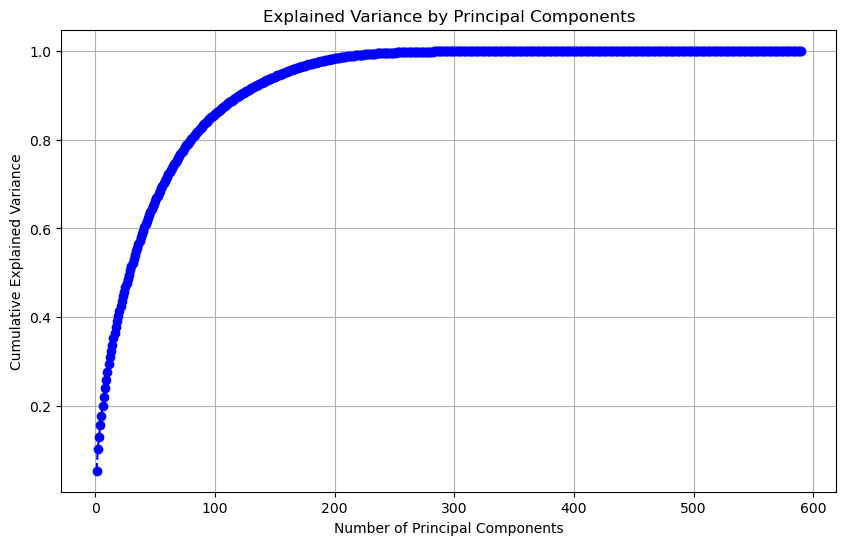

In [7]:
# Plot the explained variance and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [8]:
# Determine the number of components needed to explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 158


In [9]:
# Apply PCA again with the optimal number of components
pca_optimal = PCA(n_components=n_components_95).set_output(transform="pandas")
secom_pca_optimal = pca_optimal.fit_transform(secom_data_scaled)

secom_pca_optimal

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157
0,-0.745919,-0.107453,3.591643,-2.265534,-1.078268,0.432352,3.203903,-1.459077,0.586345,-0.128465,...,-1.399162,-0.970988,0.765390,1.085157,-0.852128,1.351813,-0.567651,-0.222668,0.987231,-0.015653
1,-0.216757,-3.260718,-4.588245,3.149330,-2.764601,0.952743,-1.532329,-1.837795,3.542800,3.169506,...,-0.266513,-0.403541,0.369211,1.928612,-0.215904,0.318676,-0.199971,-0.250996,-1.281222,-0.443229
2,0.074150,-3.289006,-1.796022,2.121194,5.671939,-3.015512,-4.380290,-2.632512,-1.438269,2.184061,...,-0.972266,-0.509511,-0.485179,-1.223665,1.529229,0.676787,0.489226,-0.150784,-0.168148,0.418307
3,-2.068737,-1.618181,0.562073,-2.430326,-1.997398,1.386943,-1.210669,-2.325825,1.248293,0.108320,...,0.010721,0.197769,0.062963,0.165376,0.579024,0.390517,-0.499806,-0.001619,-0.045170,0.329669
4,0.318059,-0.548636,2.378548,-2.263821,4.148559,-0.935855,0.080344,0.415713,-1.885009,-3.042244,...,0.798716,0.080790,0.794015,0.541181,0.548210,0.787872,0.364292,-0.478866,0.988680,0.219400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,0.397975,-0.014464,1.507150,-1.942308,1.247892,-2.317428,-0.142764,1.166708,3.755280,-0.787501,...,-0.066590,0.576186,-0.863020,-1.276255,0.628592,-0.021481,-0.391482,-0.504665,0.076641,-0.032608
2922,1.467598,-1.088157,1.233403,-1.215320,-0.533232,-1.593741,1.111565,-2.459721,3.303500,0.715207,...,0.369363,-0.376481,-0.372913,0.466400,-0.225445,-0.292167,1.187481,0.105117,-0.399801,0.927042
2923,0.180144,0.497518,0.386653,-1.608497,3.602938,-1.558226,-2.166255,1.565214,-0.650454,-0.044943,...,0.253392,-0.142341,-0.307722,-0.224670,0.522172,-0.000711,-0.033731,-0.389383,0.227348,0.177596
2924,-1.037163,3.497224,2.307023,-2.859370,0.730430,0.061338,-0.187041,2.378093,-0.260153,4.400983,...,0.382715,0.758291,0.221541,-0.080718,0.083430,-0.891405,0.604228,0.534368,0.508114,-0.069903


In [10]:
# Save the PCA transformed data to a file using pickle
with open("../dataset/secom_pca_optimal.pkl", "wb") as file:
    pickle.dump(secom_pca_optimal, file)